In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [17]:
matches_df=pd.read_csv("ipl matches 2008-2020 datasheet.csv")
matches_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [18]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [19]:
matches_df.isna().any()

id                 False
season             False
city                True
date               False
team1              False
team2              False
toss_winner        False
toss_decision      False
result             False
dl_applied         False
winner              True
win_by_runs        False
win_by_wickets     False
player_of_match     True
venue              False
umpire1             True
umpire2             True
umpire3             True
dtype: bool

In [20]:
matches_df[matches_df['city'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [21]:
matches_df['city'].fillna('Dubai', inplace=True)
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [22]:
matches_df[matches_df['winner'].isnull()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium,Nigel Llong,Ulhas Gandhe,Anil Chaudhary


In [23]:
matches_df['winner'].fillna('Draw', inplace=True)
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [24]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           756 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [25]:
matches_df=matches_df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches_df


,team1,team2,city,toss_decision,toss_winner,venue,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,field,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Pune,field,Rising Pune Supergiant,Maharashtra Cricket Association Stadium,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Rajkot,field,Kolkata Knight Riders,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Indore,field,Kings XI Punjab,Holkar Cricket Stadium,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Bangalore,bat,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore
...,...,...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai,field,Mumbai Indians,Wankhede Stadium,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians,Chennai,bat,Chennai Super Kings,M. A. Chidambaram Stadium,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals,Visakhapatnam,field,Delhi Capitals,ACA-VDCA Stadium,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings,Visakhapatnam,field,Chennai Super Kings,ACA-VDCA Stadium,Chennai Super Kings


In [26]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team1          756 non-null    object
 1   team2          756 non-null    object
 2   city           756 non-null    object
 3   toss_decision  756 non-null    object
 4   toss_winner    756 non-null    object
 5   venue          756 non-null    object
 6   winner         756 non-null    object
dtypes: object(7)
memory usage: 41.5+ KB


In [27]:
matches_df=matches_df[['team1','team2','city','toss_decision','toss_winner','venue','winner']]
matches_df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,field,Royal Challengers Bangalore,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
1,Mumbai Indians,Rising Pune Supergiant,Pune,field,Rising Pune Supergiant,Maharashtra Cricket Association Stadium,Rising Pune Supergiant
2,Gujarat Lions,Kolkata Knight Riders,Rajkot,field,Kolkata Knight Riders,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
3,Rising Pune Supergiant,Kings XI Punjab,Indore,field,Kings XI Punjab,Holkar Cricket Stadium,Kings XI Punjab
4,Royal Challengers Bangalore,Delhi Daredevils,Bangalore,bat,Royal Challengers Bangalore,M Chinnaswamy Stadium,Royal Challengers Bangalore
...,...,...,...,...,...,...,...
751,Kolkata Knight Riders,Mumbai Indians,Mumbai,field,Mumbai Indians,Wankhede Stadium,Mumbai Indians
752,Chennai Super Kings,Mumbai Indians,Chennai,bat,Chennai Super Kings,M. A. Chidambaram Stadium,Mumbai Indians
753,Sunrisers Hyderabad,Delhi Capitals,Visakhapatnam,field,Delhi Capitals,ACA-VDCA Stadium,Delhi Capitals
754,Delhi Capitals,Chennai Super Kings,Visakhapatnam,field,Chennai Super Kings,ACA-VDCA Stadium,Chennai Super Kings


In [28]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   team1          756 non-null    object
 1   team2          756 non-null    object
 2   city           756 non-null    object
 3   toss_decision  756 non-null    object
 4   toss_winner    756 non-null    object
 5   venue          756 non-null    object
 6   winner         756 non-null    object
dtypes: object(7)
memory usage: 41.5+ KB


In [29]:
matches_df['team1'].value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

In [30]:
team_encodings={
    'Mumbai Indians' : 1,
    'Sunrisers Hyderabad':2,
    'Royal Challengers Bangalore':3,
    'Kolkata Knight Riders':4,
    'Gujarat Lions':5,
    'Delhi Daredevils':6,
    'Delhi Capitals':6,
    'Kings XI Punjab':7,
    'Chennai Super Kings':8,
    'Rajasthan Royals':9,
    'Rising Pune Supergiant':10,
    'Rising Pune Supergiants':10,
    'Deccan Chargers':11,
    'Pune Warriors':12,
    'Kochi Tuskers Kerala':13,
    'Draw':14
}
team_encode_dict={
    'team1': team_encodings,
    'team2': team_encodings,
    'toss_winner':team_encodings
}

matches_df.replace(team_encode_dict, inplace=True)

In [31]:
matches_df.head()

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,Hyderabad,field,3,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad
1,1,10,Pune,field,10,Maharashtra Cricket Association Stadium,Rising Pune Supergiant
2,5,4,Rajkot,field,4,Saurashtra Cricket Association Stadium,Kolkata Knight Riders
3,10,7,Indore,field,7,Holkar Cricket Stadium,Kings XI Punjab
4,3,6,Bangalore,bat,3,M Chinnaswamy Stadium,Royal Challengers Bangalore


In [32]:
from sklearn.preprocessing import LabelEncoder
ftr_list=['city','toss_decision','venue']
encoder=LabelEncoder()
for ftr in ftr_list:
    matches_df[ftr]=encoder.fit_transform(matches_df[ftr])
    print(encoder.classes_)

['Abu Dhabi' 'Ahmedabad' 'Bangalore' 'Bengaluru' 'Bloemfontein'
 'Cape Town' 'Centurion' 'Chandigarh' 'Chennai' 'Cuttack' 'Delhi'
 'Dharamsala' 'Dubai' 'Durban' 'East London' 'Hyderabad' 'Indore' 'Jaipur'
 'Johannesburg' 'Kanpur' 'Kimberley' 'Kochi' 'Kolkata' 'Mohali' 'Mumbai'
 'Nagpur' 'Port Elizabeth' 'Pune' 'Raipur' 'Rajkot' 'Ranchi' 'Sharjah'
 'Visakhapatnam']
['bat' 'field']
['ACA-VDCA Stadium' 'Barabati Stadium' 'Brabourne Stadium' 'Buffalo Park'
 'De Beers Diamond Oval' 'Dr DY Patil Sports Academy'
 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'
 'Dubai International Cricket Stadium' 'Eden Gardens' 'Feroz Shah Kotla'
 'Feroz Shah Kotla Ground' 'Green Park'
 'Himachal Pradesh Cricket Association Stadium' 'Holkar Cricket Stadium'
 'IS Bindra Stadium' 'JSCA International Stadium Complex' 'Kingsmead'
 'M Chinnaswamy Stadium' 'M. A. Chidambaram Stadium'
 'M. Chinnaswamy Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Maharashtra Cricket Association Stadium' 'Nehru Stadium'
 'New 

In [33]:
matches_df

,team1,team2,city,toss_decision,toss_winner,venue,winner
0,2,3,15,1,3,28,Sunrisers Hyderabad
1,1,10,27,1,10,21,Rising Pune Supergiant
2,5,4,29,1,4,31,Kolkata Knight Riders
3,10,7,16,1,7,13,Kings XI Punjab
4,3,6,2,0,3,17,Royal Challengers Bangalore
...,...,...,...,...,...,...,...
751,4,1,24,1,1,40,Mumbai Indians
752,8,1,8,0,8,18,Mumbai Indians
753,2,6,32,1,6,0,Delhi Capitals
754,6,8,32,1,8,0,Chennai Super Kings


# graph between team1 and winner

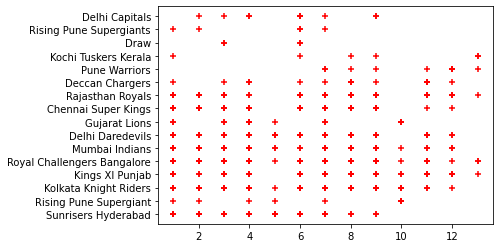

In [34]:
plt.scatter(matches_df.team1, matches_df.winner, marker='+', color='red')

# graph between team1 and winner

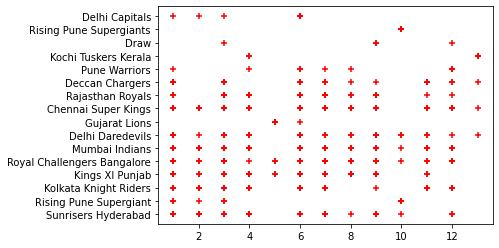

In [35]:
plt.scatter(matches_df.team2, matches_df.winner, marker='+', color='red')

# Train_Test_Split

In [36]:
x=matches_df.drop(['winner'], axis=1)

In [37]:
y=matches_df['winner']

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model= LogisticRegression()

In [42]:
model.fit(x_train, y_train)

LogisticRegression()

In [43]:
model.predict([[2,6,32,1,6,0]])[0]

'Kolkata Knight Riders'

In [44]:
model.predict(x_test)

array(['Kolkata Knight Riders', 'Kolkata Knight Riders', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Chennai Super Kings',
       'Kings XI Punjab', 'Kolkata Knight Riders',
       'Kolkata Knight Riders', 'Rajasthan Royals',
       'Kolkata Knight Riders', 'Deccan Chargers',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Rising Pune Supergiants', 'Mumbai Indians', 'Mumbai Indians',
       'Kings XI Punjab', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Chennai Super Kings', 'Mumbai Indians',
       'Rajasthan Royals', 'Mumbai Indians',
       'Royal Challengers Bangalore', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Mumbai Indians',
       'Mumbai Indians', 'Chennai Super Kings', 'Mumbai Indians',
       'Chennai Super Kings', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mum

In [45]:
model.score(x_test, y_test)

0.25

# Decision Tree Classifier

In [46]:
from sklearn import tree

In [47]:
model2 = tree.DecisionTreeClassifier()

In [48]:
model2.fit(x_train, y_train)

DecisionTreeClassifier()

In [49]:
model2.score(x_test, y_test)

0.5263157894736842

In [50]:
model2.predict([[2,6,32,1,6,0]])[0]

'Delhi Capitals'

In [51]:
model2.predict(x_test)

array(['Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Sunrisers Hyderabad', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Chennai Super Kings', 'Sunrisers Hyderabad', 'Delhi Daredevils',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Rajasthan Royals',
       'Deccan Chargers', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab',
       'Chennai Super Kings', 'Deccan Chargers', 'Sunrisers Hyderabad',
       'Delhi Capitals', 'Kolkata Knight Riders', 'Kings XI Punjab',
       'Chennai Super Kings', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Chennai Super Kings', 'Mumbai Indians', 'Delhi Daredevils',
       'Rajasthan Royals', 'Kolkata Knight Riders', 'Delhi Daredevils',
       'Rajasthan Royals', 'Kings XI Punjab', 'Delhi Daredevils',
       'Kings XI Punjab', 'Deccan Chargers',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Kings XI Punjab', 'Mumbai Indians',
       'Rajasthan Royals',

In [52]:
y_test

381          Kolkata Knight Riders
488            Sunrisers Hyderabad
651                Kings XI Punjab
531          Kolkata Knight Riders
67                Rajasthan Royals
                  ...             
615            Sunrisers Hyderabad
197               Rajasthan Royals
185                Deccan Chargers
157               Delhi Daredevils
267    Royal Challengers Bangalore
Name: winner, Length: 152, dtype: object

# Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model3 = RandomForestClassifier(n_estimators=10)

In [55]:
model3.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [56]:
model3.score(x_test,y_test)

0.5131578947368421

In [57]:
model3.predict([[2,6,32,1,6,0]])[0]

'Delhi Capitals'

In [58]:
model3.predict(x_test)

array(['Kolkata Knight Riders', 'Sunrisers Hyderabad',
       'Sunrisers Hyderabad', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Delhi Daredevils', 'Kings XI Punjab', 'Deccan Chargers',
       'Rajasthan Royals', 'Rajasthan Royals', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Chennai Super Kings', 'Deccan Chargers', 'Sunrisers Hyderabad',
       'Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad', 'Deccan Chargers', 'Mumbai Indians',
       'Delhi Daredevils', 'Rajasthan Royals', 'Mumbai Indians',
       'Delhi Daredevils', 'Rajasthan Royals', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kings XI Punjab', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Rajasthan Royals',
       'Chennai Super Kings', 'Kings XI Punjab', 'Mumbai Indians',
       'Rajasthan 

In [59]:
y_test

381          Kolkata Knight Riders
488            Sunrisers Hyderabad
651                Kings XI Punjab
531          Kolkata Knight Riders
67                Rajasthan Royals
                  ...             
615            Sunrisers Hyderabad
197               Rajasthan Royals
185                Deccan Chargers
157               Delhi Daredevils
267    Royal Challengers Bangalore
Name: winner, Length: 152, dtype: object

# SVC 

In [60]:
from sklearn.svm import SVC

In [61]:
model4=SVC()

In [62]:
model4.fit(x_train, y_train)

SVC()

In [63]:
model4.score(x_test,y_test)

0.40789473684210525

In [64]:
model4.predict([[2,6,35,1,2,0]])[0]

'Mumbai Indians'

In [65]:
model4.predict(x_test)

array(['Kolkata Knight Riders', 'Delhi Daredevils', 'Sunrisers Hyderabad',
       'Chennai Super Kings', 'Rajasthan Royals', 'Sunrisers Hyderabad',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Delhi Daredevils',
       'Kolkata Knight Riders', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Kolkata Knight Riders', 'Chennai Super Kings',
       'Chennai Super Kings', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Rajasthan Royals',
       'Royal Challengers Bangalore', 'Chennai Super Kings',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Rajasthan Royals',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Delhi Daredevils', 'Delhi Daredevils',
       'Rajasthan Royals', 'Chennai Super Kings', 'Mumbai Indians',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Mumbai Indians', 'Rajasthan Royal

In [66]:
y_test

381          Kolkata Knight Riders
488            Sunrisers Hyderabad
651                Kings XI Punjab
531          Kolkata Knight Riders
67                Rajasthan Royals
                  ...             
615            Sunrisers Hyderabad
197               Rajasthan Royals
185                Deccan Chargers
157               Delhi Daredevils
267    Royal Challengers Bangalore
Name: winner, Length: 152, dtype: object

# all

In [67]:
def get_score(model, x_train, x_test,y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [68]:
get_score(LogisticRegression(),x_train,x_test,y_train,y_test)

0.25

In [69]:
get_score(SVC(),x_train,x_test,y_train,y_test)

0.40789473684210525

In [70]:
get_score(RandomForestClassifier(),x_train,x_test,y_train,y_test)

0.5526315789473685

# cross validation scores

In [71]:
from sklearn.model_selection import cross_val_score

In [72]:
cross_val_score(LogisticRegression(),x,y)

array([0.23684211, 0.33112583, 0.27152318, 0.28476821, 0.24503311])

In [73]:
cross_val_score(tree.DecisionTreeClassifier(),x,y)

array([0.51973684, 0.47682119, 0.45695364, 0.44370861, 0.48344371])

In [74]:
cross_val_score(RandomForestClassifier(n_estimators=10),x,y)

array([0.48684211, 0.49668874, 0.39735099, 0.45033113, 0.51655629])

In [75]:
cross_val_score(SVC(),x,y)

array([0.34210526, 0.37748344, 0.38410596, 0.35099338, 0.41721854])

# predictions through random forest

In [76]:
predict = model3.predict(x_test)

In [77]:
df=pd.DataFrame({'Actual':y_test,'prediction':predict})
df

,Actual,prediction
381,Kolkata Knight Riders,Kolkata Knight Riders
488,Sunrisers Hyderabad,Sunrisers Hyderabad
651,Kings XI Punjab,Sunrisers Hyderabad
531,Kolkata Knight Riders,Kolkata Knight Riders
67,Rajasthan Royals,Rajasthan Royals
...,...,...
615,Sunrisers Hyderabad,Rajasthan Royals
197,Rajasthan Royals,Rajasthan Royals
185,Deccan Chargers,Kings XI Punjab
157,Delhi Daredevils,Delhi Daredevils


# predictions through SVC

In [78]:
predict = model4.predict(x_test)

In [79]:
df=pd.DataFrame({'Actual':y_test,'prediction':predict})
df

,Actual,prediction
381,Kolkata Knight Riders,Kolkata Knight Riders
488,Sunrisers Hyderabad,Delhi Daredevils
651,Kings XI Punjab,Sunrisers Hyderabad
531,Kolkata Knight Riders,Chennai Super Kings
67,Rajasthan Royals,Rajasthan Royals
...,...,...
615,Sunrisers Hyderabad,Mumbai Indians
197,Rajasthan Royals,Kings XI Punjab
185,Deccan Chargers,Delhi Daredevils
157,Delhi Daredevils,Chennai Super Kings


# predictions through decision tree

In [80]:
predict = model2.predict(x_test)

In [81]:
df=pd.DataFrame({'Actual':y_test,'prediction':predict})
df

,Actual,prediction
381,Kolkata Knight Riders,Kolkata Knight Riders
488,Sunrisers Hyderabad,Sunrisers Hyderabad
651,Kings XI Punjab,Sunrisers Hyderabad
531,Kolkata Knight Riders,Kolkata Knight Riders
67,Rajasthan Royals,Rajasthan Royals
...,...,...
615,Sunrisers Hyderabad,Rising Pune Supergiant
197,Rajasthan Royals,Royal Challengers Bangalore
185,Deccan Chargers,Deccan Chargers
157,Delhi Daredevils,Delhi Daredevils


# predictions through LogisticRegression

In [82]:
predict = model.predict(x_test)

In [83]:
df=pd.DataFrame({'Actual':y_test,'prediction':predict})
df

,Actual,prediction
381,Kolkata Knight Riders,Kolkata Knight Riders
488,Sunrisers Hyderabad,Kolkata Knight Riders
651,Kings XI Punjab,Mumbai Indians
531,Kolkata Knight Riders,Kolkata Knight Riders
67,Rajasthan Royals,Kings XI Punjab
...,...,...
615,Sunrisers Hyderabad,Kolkata Knight Riders
197,Rajasthan Royals,Chennai Super Kings
185,Deccan Chargers,Kings XI Punjab
157,Delhi Daredevils,Chennai Super Kings


In [84]:
model.predict([[2,6,32,1,6,0]])[0]

'Kolkata Knight Riders'

In [85]:
model2.predict([[2,6,32,1,6,0]])[0]

'Delhi Capitals'

In [86]:
model3.predict([[2,6,32,1,6,0]])[0]

'Delhi Capitals'

In [87]:
model4.predict([[2,6,32,1,6,0]])[0]

'Mumbai Indians'